# Adapted Bar Charts

These plots can be adapted for use as bivariate plots by, instead of indicating count by height, indicating a mean or other statistic on a second variable.

> For this you can use [barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html) function

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Import data
fuel_econ = pd.read_csv('./data/fuel-econ.csv')
print(fuel_econ.shape)
fuel_econ.head(10)

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6
6,32210,Lexus,GS 350 AWD,2013,Midsize Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,18.5752,23.5261,26.3573,36.2109,21.4213,412,5,5
7,32214,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,4,2.0,89,0,17.4460,21.7946,26.6295,37.6731,20.6507,432,5,5
8,32215,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Manual 6-spd,Premium Gasoline,4,2.0,89,0,20.6741,26.2000,29.2741,41.8000,23.8235,375,6,6
9,32216,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,6,3.8,89,0,16.4675,20.4839,24.5605,34.4972,19.3344,461,4,4


### Preparatory Step 1 - Convert the "VClass" column from a plain object type into an ordered categorical type

In [3]:
# Types of sedan cars
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

# Returns the types for sedan_classes with the categories and orderedness
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

### Adjusted bar chart

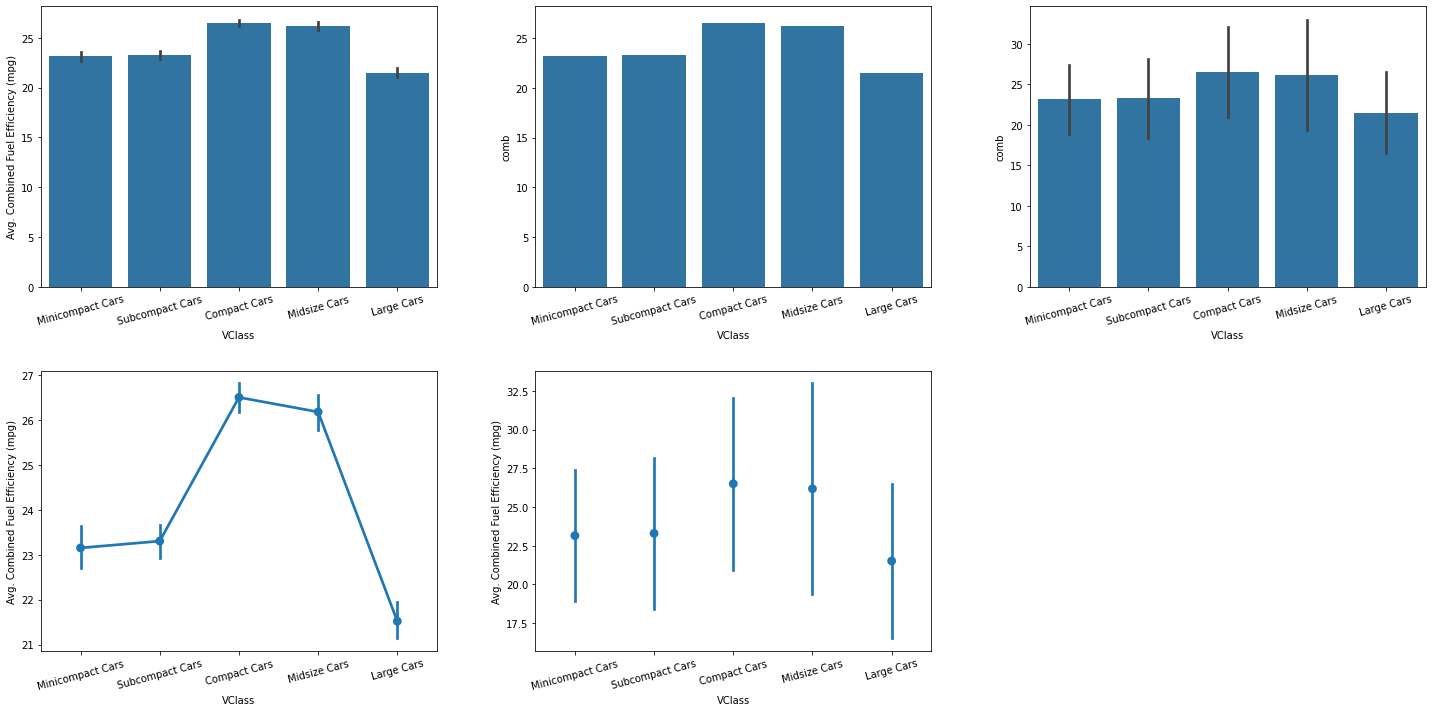

In [40]:
# Initialize the plot figure
plt.figure(figsize=[20,10])

base_color = sb.color_palette()[0]

# Fig 1: Default bar plot
plt.subplot(2,3,1)
sb.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)')

# Fig 2: Without error tick
plt.subplot(2,3,2)
plt.xticks(rotation=15)
sb.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color, errwidth=0)

# Fig 3: Using the standard deviation
plt.subplot(2,3,3)
plt.xticks(rotation=15)
sb.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color, ci='sd')

# Fig 4: Point plot default
plt.subplot(2,3,4)
sb.pointplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=15)
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

# Fig 5: Point plot
plt.subplot(2,3,5)
sb.pointplot(data=fuel_econ, x='VClass', y='comb', color=base_color, ci='sd', linestyles="")
plt.xticks(rotation=15)
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

plt.tight_layout(h_pad=3, w_pad=5.5)